# Realizando imports necessários

In [1]:
import torch
import itertools
import matplotlib.pyplot as plt
from nn.knn import KNN

# Definindo funções do problema

In [2]:
# Função alvo de aproximação
def f(x):
    return 2.0 * x.pow(2.0) * torch.sin(15.0 * x)

# Função para calcular o erro quadrático médio
def mse(target, predicted):
    mse_ = (target - predicted).pow(2.0)
    mse_ = mse_.sum() / mse_.shape[0]
    return mse_

# Criando listas de samples e seus targets

In [3]:
samples_train = []
sample_target = []
samples_test = torch.linspace(-1.0, 1.0, 1000).reshape((1000, 1)) # Gerando amostras para teste

N = [4, 10, 100] # Conjunto com o tamanho de cada sample
K = [1, 3, 5] # Conjunto dos ks utilizados 

# Gerando samples e seus targets
for n in N:
    samples_train.append(torch.linspace(-1.0, 1.0, n).reshape((n, 1)))
    sample_target.append(f(samples_train[-1]))


# Plotando os gráficos

  1-NN | SET-SIZE   4 | TEST MSE: 0.893137 | TRAIN MSE 0.000000
  3-NN | SET-SIZE   4 | TEST MSE: 0.555719 | TRAIN MSE 0.584947
  5-NN | SET-SIZE   4 | TEST MSE: 0.464841 | TRAIN MSE 0.868453
  1-NN | SET-SIZE  10 | TEST MSE: 0.189107 | TRAIN MSE 0.000000
  3-NN | SET-SIZE  10 | TEST MSE: 0.497960 | TRAIN MSE 0.648597
  5-NN | SET-SIZE  10 | TEST MSE: 0.437254 | TRAIN MSE 0.541781
  1-NN | SET-SIZE 100 | TEST MSE: 0.002621 | TRAIN MSE 0.000000
  3-NN | SET-SIZE 100 | TEST MSE: 0.003174 | TRAIN MSE 0.001878
  5-NN | SET-SIZE 100 | TEST MSE: 0.005847 | TRAIN MSE 0.005110


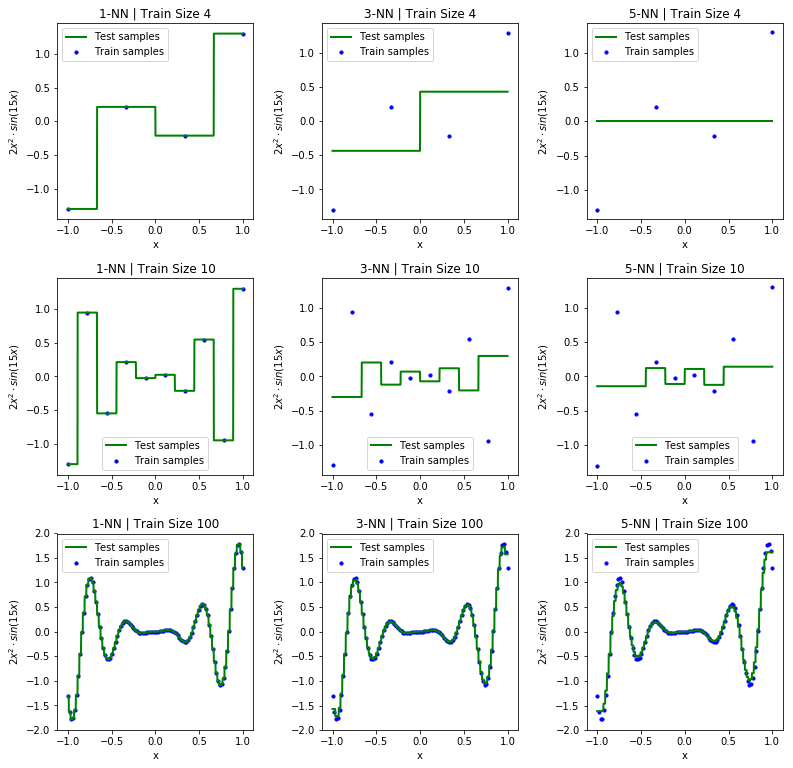

In [4]:
fig, axs = plt.subplots(len(N), len(K), figsize=(13, 13))
fig.subplots_adjust(hspace=0.30, wspace=0.35)

for idx in itertools.product([i for i in range(len(N))], [j for j in range(len(K))]):
    clf = KNN(K[idx[1]], samples_train[idx[0]], sample_target[idx[0]], regression=True)
    
    test_target = clf.predict(samples_test)
    
    axs[idx[0], idx[1]].set_title('%s-NN | Train Size %s' % (K[idx[1]], N[idx[0]]))
    axs[idx[0], idx[1]].set_xlabel('x')
    axs[idx[0], idx[1]].set_ylabel(r'$2x^2 \cdot sin(15x)$')
    axs[idx[0], idx[1]].plot(samples_test, test_target, lw=2, c='green', label='Test samples')
    axs[idx[0], idx[1]].scatter(samples_train[idx[0]], sample_target[idx[0]], s=10, c='blue', 
                                label='Train samples')
    axs[idx[0], idx[1]].legend()
    
    print("%3d-NN | SET-SIZE %3d | TEST MSE: %2.6f | TRAIN MSE %2.6f" % 
          (K[idx[1]], N[idx[0]], 
           mse(f(samples_test), test_target), 
           mse(sample_target[idx[0]], clf.predict(samples_train[idx[0]]))))

plt.savefig('plots/ex2-1-plot.png')
plt.show()

# Conclusão
Neste problema podemos perceber que quanto menor o número de vizinhos utilizado no algoritmo, menor será o erro quadrático médio gerado pela função de predição. Outro ponto que percebemos, graficamente, é que quanto maior a quantidade de amostras de treinamento, melhor será a aproximação da função.

# Autores
- **Christiano Machado** @ https://github.com/chrismachado
- **Vitor Veras** @ https://github.com/vitorverasm